### Теория вероятностей и математическая статистика
##### Домашнее задание №3

<b>Задача 1</b>

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [31]:
from statistics import mean
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

####### Среднее арифметическое #######
# вручную
total = 0
for i in range(len(salaries)):
    total += salaries[i]
print(f'Среднее арифметическое вручную: {total/len(salaries)}')

# То же, но с использованием встроенной функции
print(f'Среднее арифметическое функция: {mean(salaries)}')
print('####################################################') # разделитель

####### СКО #######
# Вручную, не смещенная
sum_of_sqared_deviations = sum(pow(salaries[n]-mean(salaries), 2) for n in range(len(salaries)))
std = m.sqrt(pow(len(salaries)-1, -1)*sum_of_sqared_deviations)
print(f'СКО вручную: {std}')

# То же, но с использованием встроенной функции
df = pd.DataFrame(salaries, columns=['salary'])
sal_std = df['salary'].std()
print(f'СКО функция: {sal_std}')
print('####################################################') # разделитель

######## Дисперсия смещенная #######
# Вручную
d = sum_of_sqared_deviations/(len(salaries))
print(f'Дисперсия смещенная вручную {d}')
# Встроенная функция numpy
print(f'Дисперсия смещенная функция {np.var(df)}') # numpy считает смещенную дисперсию
print('####################################################') # разделитель


######## Дисперсия несмещенная #######
# Вручную
d_x = sum_of_sqared_deviations/(len(salaries)-1)
print(f'Дисперсия несмещенная вручную {d_x}')
# Встроенная функция pandas
print(f'Дисперсия несмещенная функция {df.var()}') # pandas считает несмещенную дисперсию

Среднее арифметическое вручную: 65.3
Среднее арифметическое функция: 65.3
####################################################
СКО вручную: 31.624607341019814
СКО функция: 31.624607341019814
####################################################
Дисперсия смещенная вручную 950.11
Дисперсия смещенная функция salary    950.11
dtype: float64
####################################################
Дисперсия несмещенная вручную 1000.1157894736842
Дисперсия несмещенная функция salary    1000.115789
dtype: float64


<b>Задача 2</b>

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [27]:
q1 = df['salary'].quantile([0.25])
q3 = df['salary'].quantile([0.75])
iqr = q3[0.75]-q1[0.25]

print(f'Первый квартиль: {q1[0.25]}')
print(f'Третий квартиль: {q3[0.75]}')
print(f'Интерквартильный размах: {iqr}')

Первый квартиль: 42.0
Третий квартиль: 81.0
Интерквартильный размах: 39.0


(-16.5, 139.5)

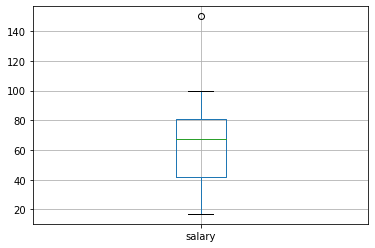

In [37]:
df[['salary']].boxplot()

boxplot_range = (q1[0.25] - 1.5 * iqr, q3[0.75] + 1.5 * iqr)
boxplot_range

В нашем случае нижний "ус" ящика на уровне 17, так как это минимальное значение из выборки, и в промежутке от 17 до -16,5 других значений нет. То же самое и сверхним "усом". Максимальное значение выборки (150) лежит за пределами 139,5, в промежутке от 139,5 до 150 других значений нет, поэтому верхний "ус" на уровне 100 - следующее по убыванию значение после 150.

In [42]:
# Выбросы
outliers = df.loc[(df['salary'] < boxplot_range[0]) | (df['salary'] > boxplot_range[1])]

outliers

,salary
19,150


Мы вычислили наличие одного выброса, это значение 150.

<b>Задача 3</b>

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

Пусть событие S - сдача сессии (чтобы не путать с буквами факультетов). По условию задачи вероятности сдачи сессии студентами разных факультетов равны:
$$
P(S|A)=0.8$$
$$
P(S|B)=0.7$$
$$
P(S|C)=0.9$$
Вероятность попасть на факультет равна:
$$
P(A)=0.25$$
$$
P(B)=0.25$$
$$
P(C)=0.5$$
Суть задачи состоит в том, чтобы найти вероятности: а) $P(A|S)-?$; б) $P(B|S)-?$; в) $P(C|S)-?$

Найдем вероятность сдачи сессии по формуле полной вероятности: $P(S)=P(S|A)\cdot P(A)+P(S|B)\cdot P(B)+P(S|C)\cdot P(C)=0.8\cdot 0.25 + 0.7\cdot 0.25 + 0.9\cdot 0.5=0.825$
<br>
Далее воспользуемся формулой Байеса:<br>
а) $$P(A|S)=\frac{P(S|A)\cdot P(A)}{P(S)}=\frac{0.8\cdot 0.25}{0.825}=0.24$$
<br>
б) $$P(B|S)=\frac{P(S|B)\cdot P(B)}{P(S)}=\frac{0.7\cdot 0.25}{0.825}=0.21$$
<br>
в) $$P(C|S)=\frac{P(S|C)\cdot P(C)}{P(S)}=\frac{0.9\cdot 0.5}{0.825}=0.55$$